In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/MauCFD/Project_1/main/project%201%20-%20Analyzing%20a%20Loyalty%20Program/Project_df.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df1.head()

,Client ID,Town,State,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,Tlalnepantla,Ciudad de Mexico,1,1,2018,C4,D5,59000,51951,0.88,0,0.0
1,2,Tlalnepantla,Ciudad de Mexico,2,1,2018,C4,D5,59000,15301,0.26,0,0.0
2,2,Tlalnepantla,Ciudad de Mexico,5,2,2018,C4,D5,59000,19807,0.34,0,0.0
3,2,Tlalnepantla,Ciudad de Mexico,6,2,2018,C4,D5,59000,16916,0.29,0,0.0
4,2,Tlalnepantla,Ciudad de Mexico,8,3,2018,C4,D5,59000,88353,1.50,1080,928.8


In [4]:
df2 = df1[['Client ID','Month','Year','Total Sales','Distributor']]
df2

,Client ID,Month,Year,Total Sales,Distributor
0,2,1,2018,51951,D5
1,2,2,2018,15301,D5
2,2,5,2018,19807,D5
3,2,6,2018,16916,D5
4,2,8,2018,88353,D5
...,...,...,...,...,...
14579,1371,11,2020,218149,D12
14580,1371,12,2020,119233,D12
14581,1372,10,2020,26834,D15
14582,1372,11,2020,35671,D15


In [5]:
month_number = df2.groupby(by=["Client ID"]).count()
agg_sales_customer = df2.groupby(by=["Client ID"]).sum()
customer_distributor = df2[['Client ID','Distributor']].drop_duplicates()

In [6]:
distributors = customer_distributor[['Distributor']].drop_duplicates()
distributors['Dist ID'] = np.arange(16).astype(int)
distributors.set_index('Distributor',inplace=True)
distributors

,Dist ID
Distributor,
D5,0
D13,1
D12,2
D10,3
D3,4
D8,5
D2,6
D11,7
D9,8


In [7]:
final_distributors = customer_distributor.join(distributors,on='Distributor',how='left')
final_distributors

,Client ID,Distributor,Dist ID
0,2,D5,0
24,4,D13,1
33,10,D12,2
65,12,D10,3
101,13,D13,1
...,...,...,...
14566,1369,D2,6
14571,1357,D13,1
14575,1370,D13,1
14578,1371,D12,2


In [8]:
month_number2 = month_number[['Month']]
month_number2.head()

,Month
Client ID,
2,24
4,9
10,32
12,36
13,8


In [9]:
new_df = final_distributors.join(agg_sales_customer, on='Client ID')
new_df.drop('Month',
  axis='columns', inplace=True)
new_df.drop('Year',
  axis='columns', inplace=True)
new_df

,Client ID,Distributor,Dist ID,Total Sales
0,2,D5,0,801212
24,4,D13,1,86690
33,10,D12,2,2434224
65,12,D10,3,12948576
101,13,D13,1,495714
...,...,...,...,...
14566,1369,D2,6,74489
14571,1357,D13,1,13226
14575,1370,D13,1,95839
14578,1371,D12,2,614375


In [10]:
final_df = new_df.join(month_number2, on='Client ID')
final_df['Average Monthly Sales']= final_df['Total Sales']/final_df['Month']
final_df.head()

,Client ID,Distributor,Dist ID,Total Sales,Month,Average Monthly Sales
0,2,D5,0,801212,24,33383.833333
24,4,D13,1,86690,9,9632.222222
33,10,D12,2,2434224,32,76069.500000
65,12,D10,3,12948576,36,359682.666667
101,13,D13,1,495714,8,61964.250000


In [116]:
x = final_df.iloc[:, [2,5]].values

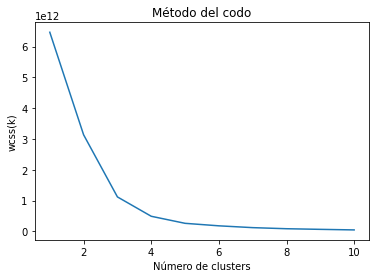

In [117]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("wcss(k)")
#plt.savefig('elbow_method_dist_vmens', dpi=None, facecolor='w', edgecolor='w',
 #       orientation='portrait', format=None,
  #      transparent=False, bbox_inches=None, pad_inches=0.1,
   #     metadata=None)
plt.show()

In [124]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

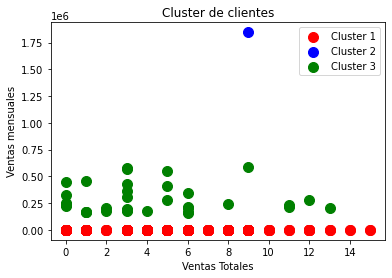

In [125]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,0], s= 100, c= "red", label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s= 100, c= "blue", label = "Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s= 100, c= "green", label = "Cluster 3")



plt.title("Cluster de clientes")
plt.xlabel("Ventas Totales")
plt.ylabel("Ventas mensuales")
plt.legend()
plt.savefig('3Cl_dist_vmens', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show() 


In [74]:
y_kmeans

array([1, 1, 5, 4, 1, 4, 3, 3, 5, 5, 0, 1, 0, 1, 3, 3, 1, 1, 5, 3, 3, 0,
       0, 2, 1, 3, 3, 1, 0, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 5,
       3, 0, 3, 1, 1, 5, 3, 2, 5, 5, 1, 1, 0, 3, 3, 1, 1, 5, 5, 3, 5, 5,
       0, 0, 1, 2, 1, 4, 3, 5, 1, 5, 3, 5, 3, 5, 0, 3, 1, 5, 5, 3, 3, 3,
       2, 4, 1, 1, 5, 1, 3, 1, 3, 5, 1, 1, 1, 5, 3, 1, 1, 1, 3, 3, 5, 3,
       3, 5, 0, 3, 1, 3, 1, 0, 1, 3, 5, 1, 1, 3, 3, 3, 3, 1, 5, 1, 0, 3,
       0, 0, 0, 3, 3, 1, 1, 1, 1, 5, 5, 1, 3, 1, 1, 1, 3, 3, 4, 1, 3, 3,
       1, 1, 3, 1, 4, 1, 2, 3, 3, 4, 5, 3, 1, 1, 1, 1, 5, 3, 3, 1, 5, 5,
       0, 3, 5, 3, 1, 4, 3, 4, 3, 1, 5, 5, 0, 3, 3, 3, 5, 5, 3, 1, 5, 1,
       1, 3, 5, 3, 3, 3, 3, 1, 3, 1, 5, 5, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 5, 1,
       1, 5, 5, 1, 1, 3, 5, 3, 1, 1, 1, 1, 1, 1, 5, 3, 1, 3, 3, 3, 5, 5,
       5, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 5, 0, 3, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 4, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1,